# Riley, Alexander -- Homework 4

## Problem 1

Suppose we observe $X_1,\ldots,X_n \sim f(x|\lambda)$ where $f(x|\lambda)$ is an exponential distribution with rate parameter $\lambda$. Specifically
$$ f(x|\lambda) = \lambda e^{-\lambda x}$$
for $x \geq 0$. We put a $Gamma(\alpha,\beta)$ prior $\pi(\lambda)$ on $\lambda$. This prior has the form
$$\pi(\lambda) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta\lambda}$$
for $\lambda > 0$. Recall that $\alpha$ and $\beta$ are fixed, known constants.

1. Using a few lines of algebra determine that the posterior distribution is $Gamma(\alpha' = n + \alpha,\beta' = \sum x_i + \beta)$.
2. Plot the Gamma prior probability density with $\alpha=3$, $\beta=1/2$ and plot the posterior density assuming $n=10$ and `[0.16265459,0.64434542, 0.00794972, 1.01595712, 1.31977252,0.08782853, 0.10424722, 0.50344791, 0.29815325, 0.73709422]`.

We start with the simplified Bayes' theorem:
$$ f(\lambda | x) \propto {\ell(x|\lambda)\pi(\lambda)} $$
where the likelihood is
$$ \ell(x|\lambda) = \prod_i \lambda e^{-\lambda x_i} = \lambda^n e^{-\lambda\sum x_i} $$
This gives
$$ f(\lambda | x) \propto \lambda^n e^{-\lambda\sum x_i}\frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta\lambda} $$
which we can see can simplify to something like
$$ f(\lambda | x) \propto \lambda^{(\alpha+n)-1} e^{-\lambda(\beta + \sum x_i)}$$
This is $Gamma(\alpha' = n + \alpha,\beta' = \sum x_i + \beta)$.  The normalization constant from the marginalized likelihood (denominator in Bayes' theorem) would modify the $\beta^\alpha/\Gamma(\alpha)$ term from the to be $\beta'^{\alpha'}/\Gamma(\alpha')$

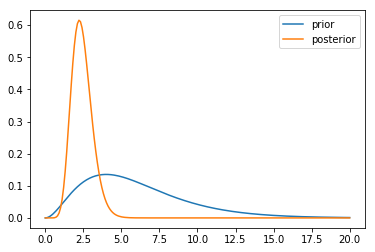

In [1]:
import numpy as np
from scipy.stats import gamma
%matplotlib inline
import matplotlib.pyplot as plt

alpha = 3
beta = 1/2

data = [0.16265459,0.64434542, 0.00794972, 1.01595712, 1.31977252,
        0.08782853, 0.10424722, 0.50344791, 0.29815325, 0.73709422]

alpha2 = alpha + len(data)
beta2 = beta + sum(data)

l = np.linspace(0,20,200)
prior = gamma.pdf(l,alpha,scale=1/beta)
posterior = gamma.pdf(l,alpha2,scale=1/beta2)

plt.plot(l, prior, label='prior')
plt.plot(l, posterior, label='posterior')
plt.legend(loc='best');

## Problem 2

Recall that the posterior is proportional to the likelihood times the prior
$$ \pi(\lambda|x) \propto f(x|\lambda)\pi(\lambda)$$
Here $x=(x_1,\ldots,x_n)$ and $f(x|\lambda) = \lambda^n e^{-\lambda \sum x_i}$ is the joint probability density function. Plot $f(x|\lambda)\pi(\lambda)$ for the $Gamma(\alpha=3,\beta=1/2)$ prior and data from the previous part. Numerically integrate this function and use the result to normalize $f(x|\lambda)\pi(\lambda)$. Verify that the result matches the posterior you found in Problem 1.

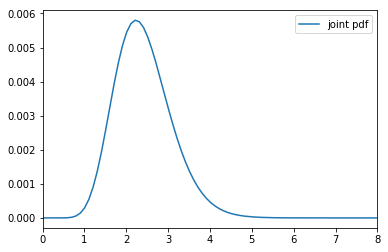

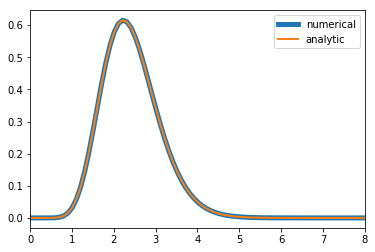

In [2]:
from scipy.integrate import trapz
jointpdf = gamma.pdf(l,alpha,scale=1/beta)
jointpdf *= l**len(data)*np.exp(-l*sum(data))

plt.plot(l,jointpdf, label='joint pdf')
plt.legend(loc='best')
plt.xlim(0,8)
plt.show()

plt.plot(l, jointpdf/trapz(jointpdf,l), lw=5.0, label='numerical')
plt.plot(l, posterior,lw=2.0, label='analytic')
plt.xlim(0,8)
plt.legend(loc='best');

## Problem 3

Write (or adapt code from class) a Metropolis Hastings algorithm to sample from the posterior. Draw a histogram of the samples and verify that they approximately match the posterior determined using conjugacy or numerical integration. Compute the posterior mean and make a 95% credible interval for $\lambda$ (you can make this interval many ways, but the most popular method is to compute the 0.025 and .975 quantiles of the posterior samples). You can verify that you have the right answer by computing the interval from the conjugacy result in problem 1.

In [3]:
def post(li):
    jointpdf = gamma.pdf(li,alpha,scale=1/beta)
    jointpdf *= li**len(data)*np.exp(-li*sum(data))
    return jointpdf

Niter = 50000
chain = np.zeros(Niter)
chain[0] = 0.3

for ii in np.arange(Niter-1):
    prop = chain[ii] + np.random.normal(loc=0.0,scale=0.05,size=1)
    if (post(prop) / post(chain[ii])) > np.random.uniform():
        chain[ii+1] = prop
    else:
        chain[ii+1] = chain[ii]

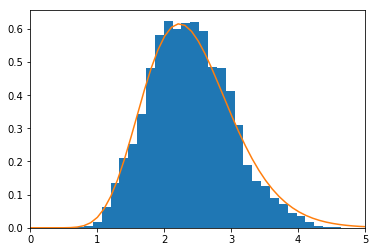

In [4]:
samples = chain[2000:]
plt.hist(samples,bins=30,density=True)
plt.plot(l, posterior, label='analytic')
plt.xlim(0,5);

In [5]:
# mean, 95% confidence intervals for sampling
print(np.mean(samples))
chain_s = np.sort(chain)
ixL = np.floor(np.size(chain_s)*.025).astype(int) ## lower index
ixU = np.floor(np.size(chain_s)*.975).astype(int) ## upper index
[chain_s[ixL], chain_s[ixU]]

2.3895892010334743


[1.285535978764507, 3.674479475829598]

In [6]:
# mean, 95% confidence intervals from conjugacy (problem 1)
print(float(gamma.stats(alpha2, scale=1/beta2, moments='m')))
[gamma.ppf(0.025, alpha2, scale=1/beta2), gamma.ppf(0.975, alpha2, scale=1/beta2)]

2.415705579750292


[1.2862614811757165, 3.895155227791643]